# QUESTION

Use the wine dataset in Sklearn to build a Logistic Regression model to classify
different types of wines based on their attributes.

## IMPORT MODULE

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

## IMPORT DATA

In [2]:
wine = load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [3]:
df = pd.DataFrame(data = wine.data, columns = wine.feature_names)
df['target'] = wine.target
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


## DATA INFORMATION

In [4]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [5]:
df.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [7]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


## DATA CLEANING

In [8]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

## DATA SCALING

<AxesSubplot:>

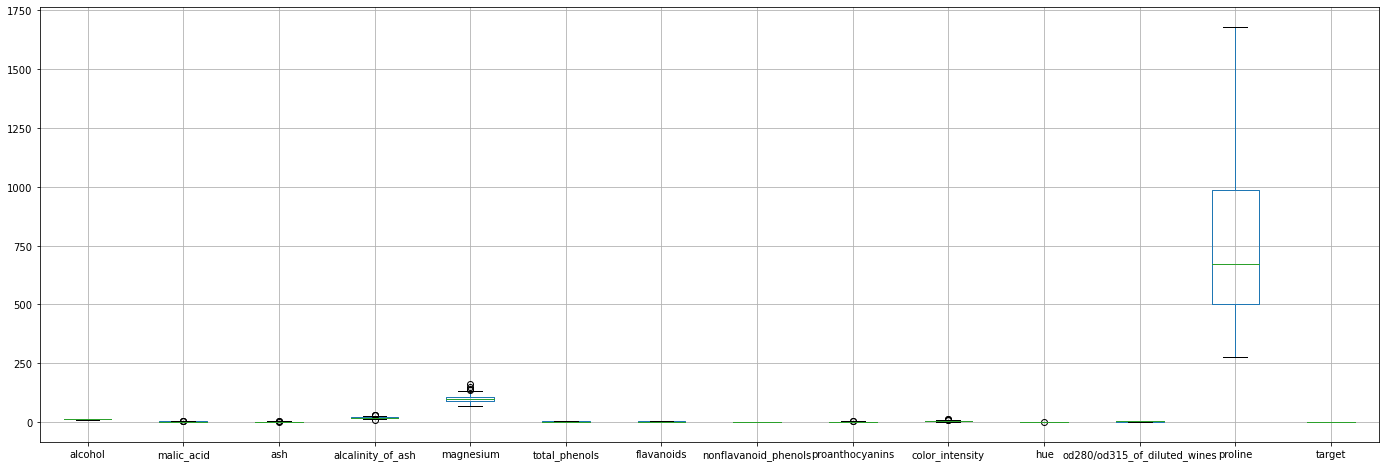

In [9]:
df.boxplot(figsize = [24,8])

In [10]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [11]:
scalar = MinMaxScaler()
scaled_features = scalar.fit_transform(df[['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline', 'target']])
data1 = pd.DataFrame(scaled_features, columns = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline', 'target'])
data1

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0.0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0.0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0.0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0.0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529,1.0
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662,1.0
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290,1.0
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856,1.0


## OUTLIERS

### DETECTING OUTLIERS

<AxesSubplot:>

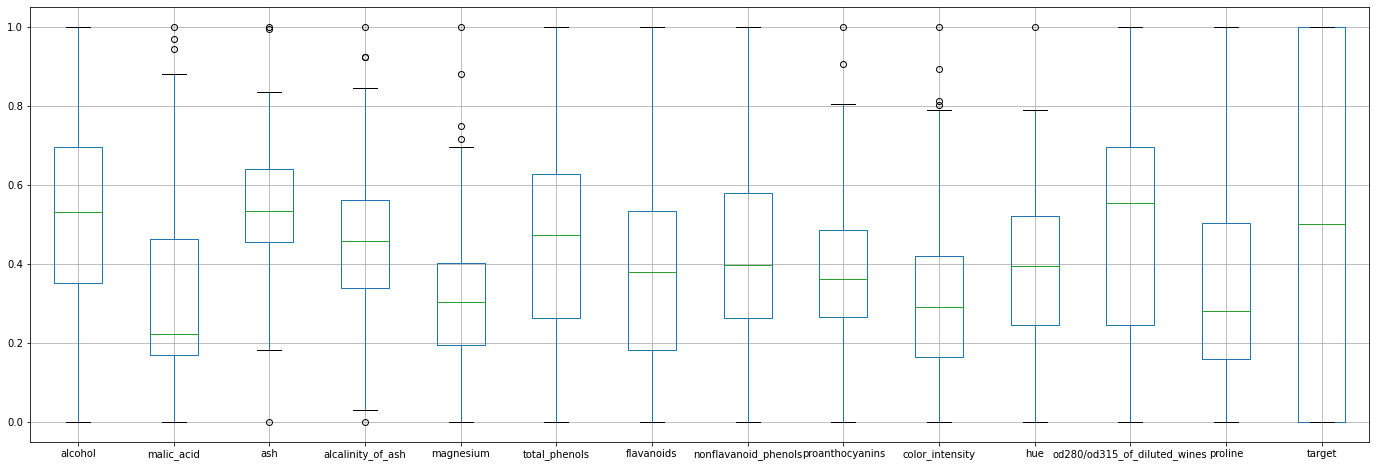

In [12]:
data1.boxplot(figsize = [24,8])

In [13]:
def out_by_iqr(data):
    out = []
    data = np.sort(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lwr_bnd = q1 - (1.5 * iqr)
    upr_bnd = q3 + (1.5 * iqr)
    for i in data:
        if (i < lwr_bnd or i > upr_bnd):
            out.append(i)
    return out    

### HANDLING OUTLIERS

In [14]:
def trim_row(data):
    for i in data.iloc[:, lambda x : [0,1,2,3,4,5,6,7,8,9,10,11,12]]:
        out = out_by_iqr(data[i])
        row_index = [(data[i])]
        data.drop(data[data[i].isin(out)].index, axis = 0, inplace = True)
    return data

In [15]:
data = trim_row(data1)
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0.0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0.0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0.0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0.0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,0.823684,0.349802,0.598930,0.484536,0.228261,0.241379,0.075949,0.584906,0.261830,0.718430,0.113821,0.161172,0.272468,1.0
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662,1.0
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290,1.0
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856,1.0


<AxesSubplot:>

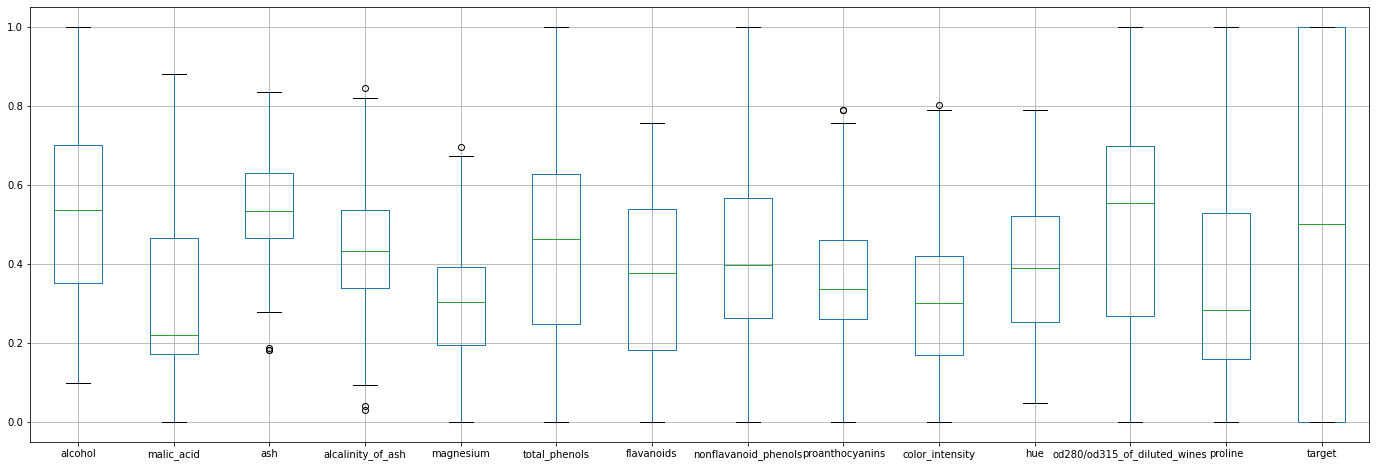

In [16]:
data.boxplot(figsize = [24,8])

## DETERMINING CLASSES

In [17]:
data['target'].value_counts()

0.5    61
0.0    57
1.0    43
Name: target, dtype: int64

### NORMALIZING CLASSES

In [18]:
data.replace(to_replace = 0.5 , value = 2, inplace = True)
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0.0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0.0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0.0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0.0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,0.823684,0.349802,0.598930,0.484536,0.228261,0.241379,0.075949,0.584906,0.261830,0.718430,0.113821,0.161172,0.272468,1.0
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662,1.0
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290,1.0
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856,1.0


### DETERMINING DATA BALANCE

In [19]:
data['target'].value_counts()

2.0    61
0.0    57
1.0    43
Name: target, dtype: int64

C:\Users\Public\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

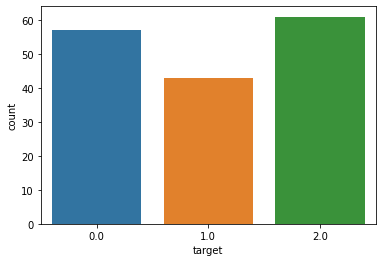

In [20]:
sns.countplot(data['target'])

## DETERMING CO-RELATION IN FEATURES

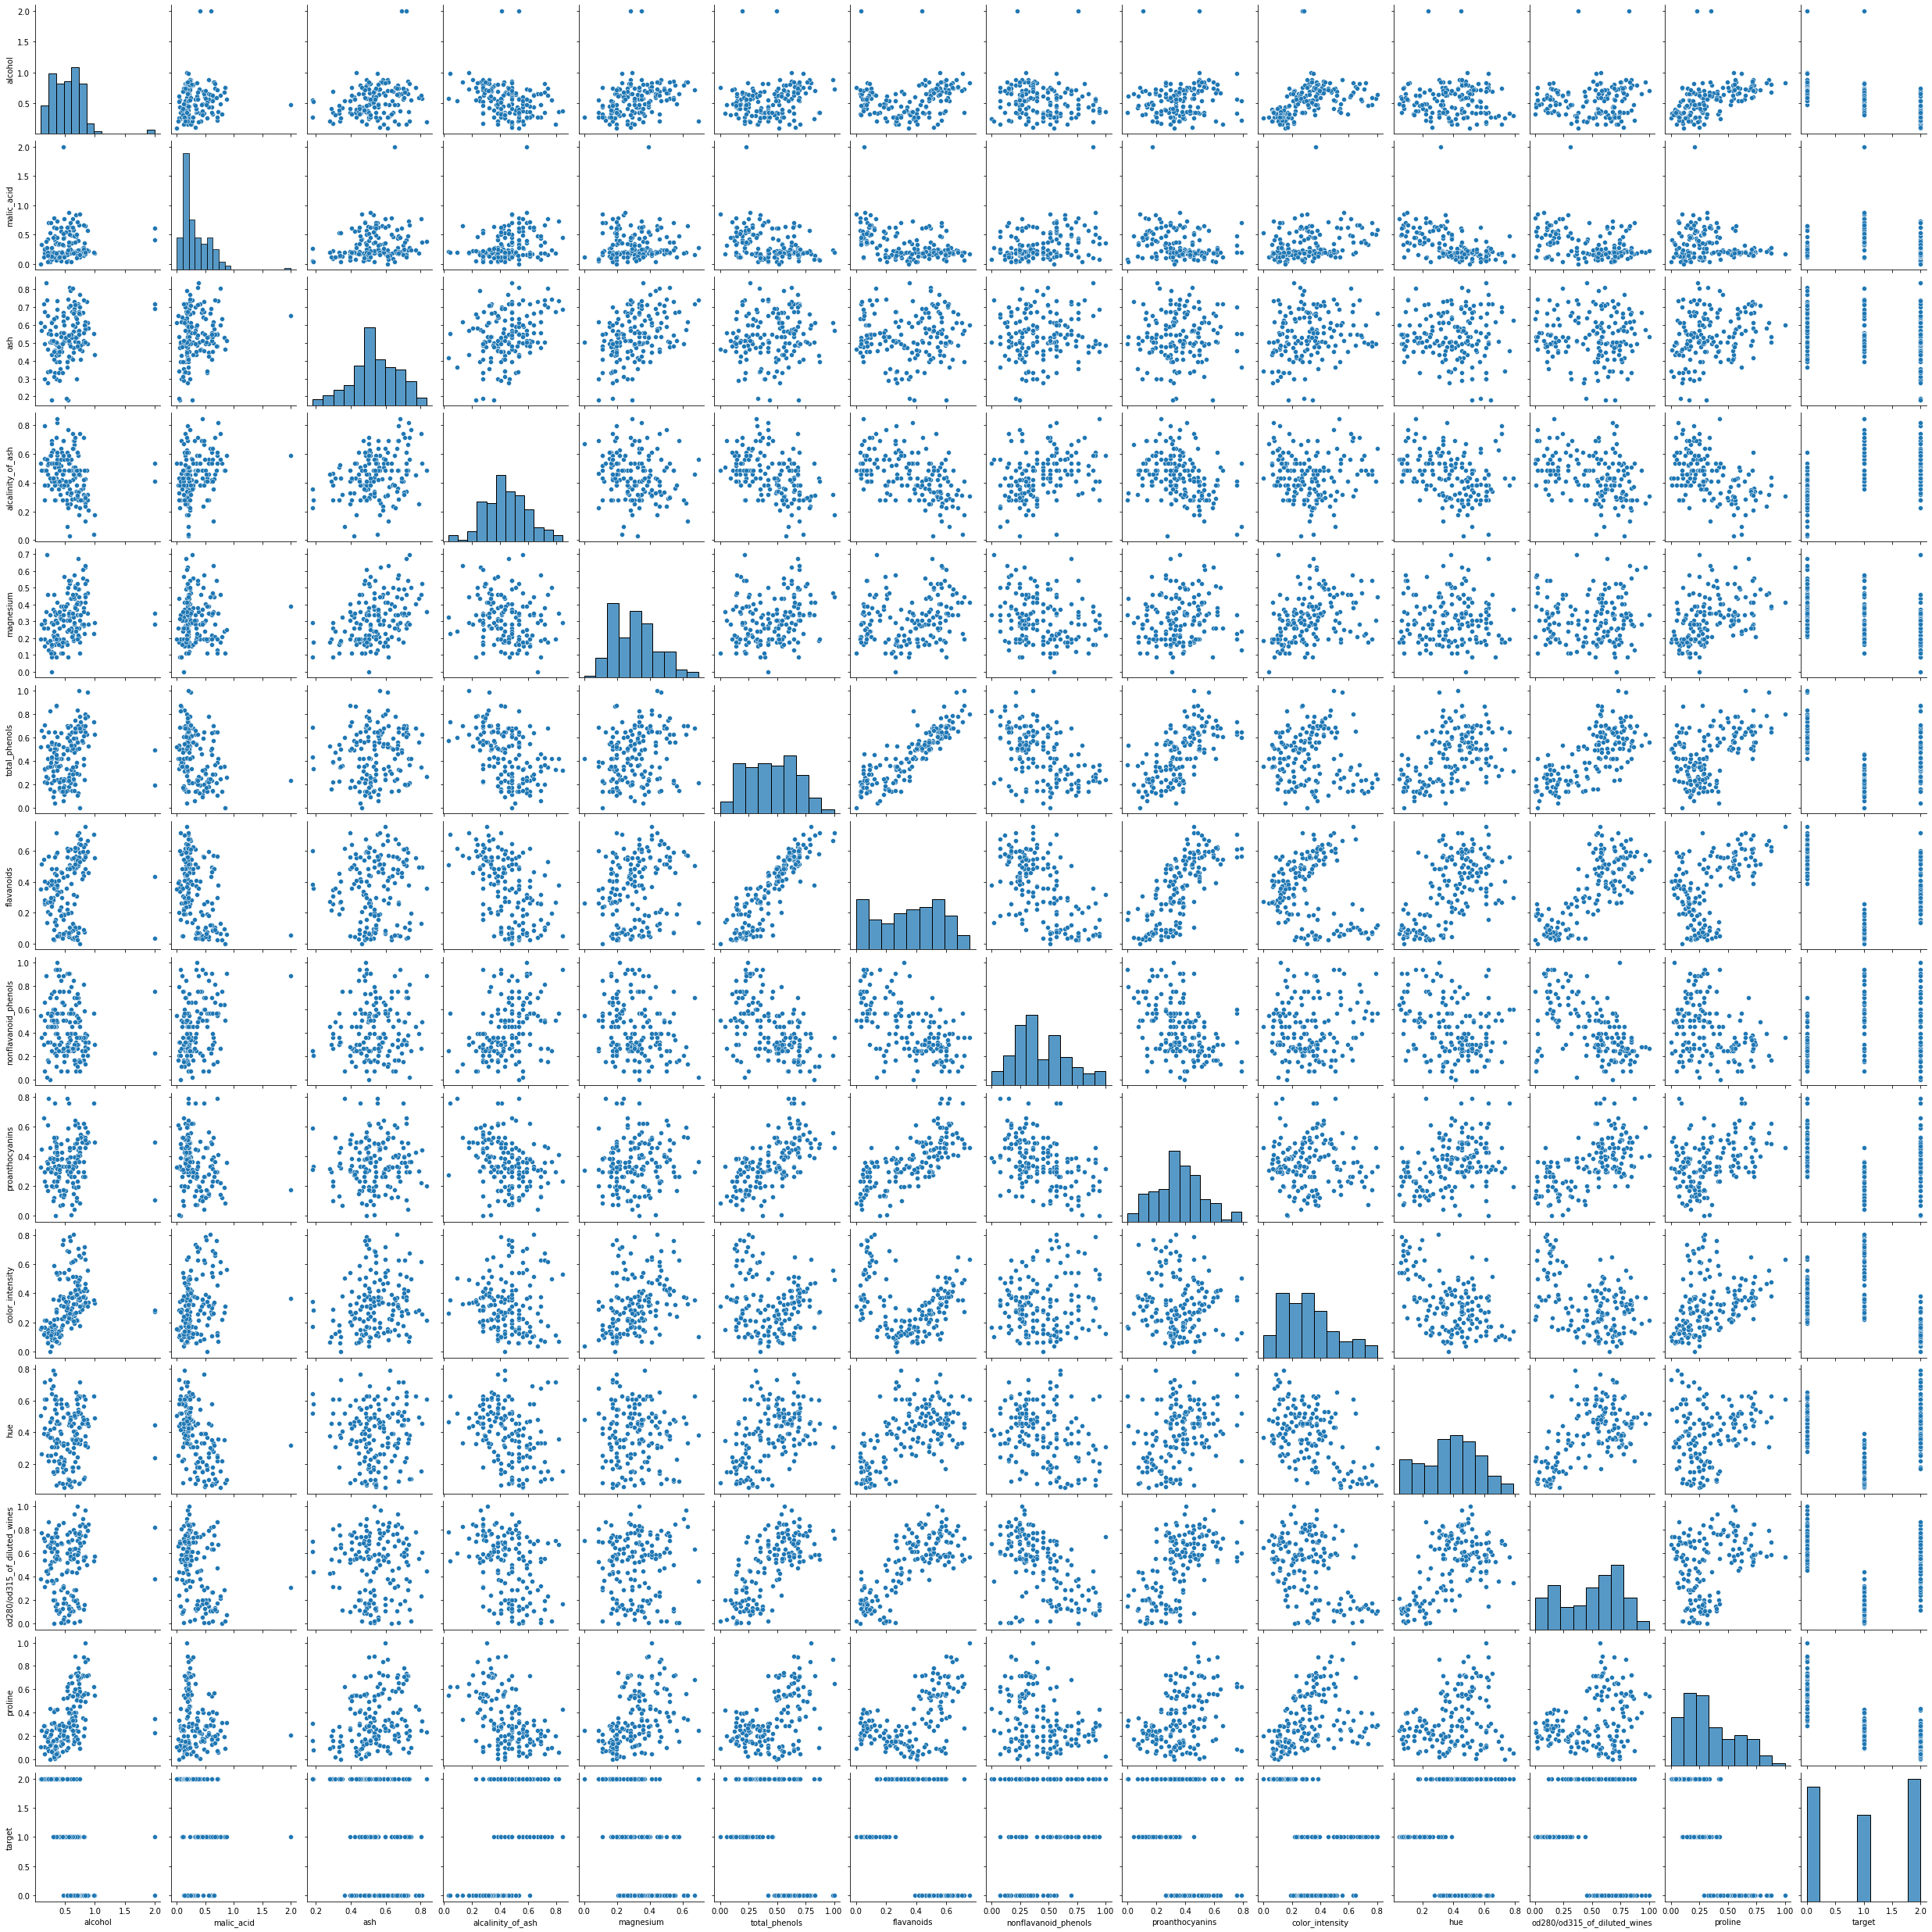

In [21]:
sns.pairplot(data)

In [22]:
data.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.110495,0.268069,-0.254294,0.333645,0.221702,0.196703,-0.119841,0.145520,0.409491,-0.026787,0.114638,0.497807,-0.659182
malic_acid,0.110495,1.000000,0.188887,0.297000,0.048153,-0.349917,-0.443721,0.328086,-0.247052,0.266368,-0.506791,-0.364363,-0.175667,-0.049534
ash,0.268069,0.188887,1.000000,0.320691,0.421118,0.106043,0.043875,0.090586,0.031043,0.210859,-0.043165,-0.032896,0.271846,-0.342450
alcalinity_of_ash,-0.254294,0.297000,0.320691,1.000000,-0.176902,-0.453056,-0.507433,0.340402,-0.308068,-0.031718,-0.318442,-0.375677,-0.472429,0.442600
magnesium,0.333645,0.048153,0.421118,-0.176902,1.000000,0.239446,0.199186,-0.235835,0.099609,0.346902,-0.021651,0.021406,0.449599,-0.525080
total_phenols,0.221702,-0.349917,0.106043,-0.453056,0.239446,1.000000,0.882622,-0.497526,0.642021,-0.065892,0.471543,0.706372,0.515427,-0.410735
flavanoids,0.196703,-0.443721,0.043875,-0.507433,0.199186,0.882622,1.000000,-0.597872,0.737851,-0.171084,0.589664,0.784737,0.524336,-0.397549
nonflavanoid_phenols,-0.119841,0.328086,0.090586,0.340402,-0.235835,-0.497526,-0.597872,1.000000,-0.430748,0.110328,-0.279525,-0.525896,-0.310505,0.276361
proanthocyanins,0.145520,-0.247052,0.031043,-0.308068,0.099609,0.642021,0.737851,-0.430748,1.000000,-0.041662,0.345698,0.585839,0.367174,-0.279636
color_intensity,0.409491,0.266368,0.210859,-0.031718,0.346902,-0.065892,-0.171084,0.110328,-0.041662,1.000000,-0.484898,-0.425764,0.360802,-0.495340


### FEATURES SELECTION

<AxesSubplot:>

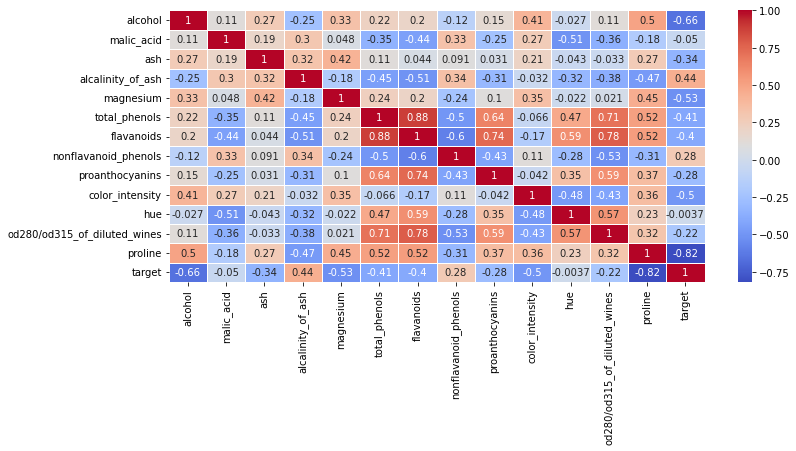

In [23]:
plt.figure(figsize = (12, 5))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm', linewidth = 1)

In [24]:
col = ['alcohol', 'flavanoids', 'hue', 'proline']

In [25]:
data.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [26]:
data[col]

,alcohol,flavanoids,hue,proline
0,0.842105,0.573840,0.455285,0.561341
1,0.571053,0.510549,0.463415,0.550642
2,0.560526,0.611814,0.447154,0.646933
3,0.878947,0.664557,0.308943,0.857347
4,0.581579,0.495781,0.455285,0.325963
...,...,...,...,...
172,0.823684,0.075949,0.113821,0.272468
174,0.623684,0.086498,0.178862,0.336662
175,0.589474,0.073840,0.089431,0.397290
176,0.563158,0.071730,0.097561,0.400856


### PLOTTING FEATURES

In [27]:
def join_func(col1, col2):
    sns.jointplot(col1, col2, data = data, hue = 'target')

C:\Users\Public\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Public\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Public\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Public\ana

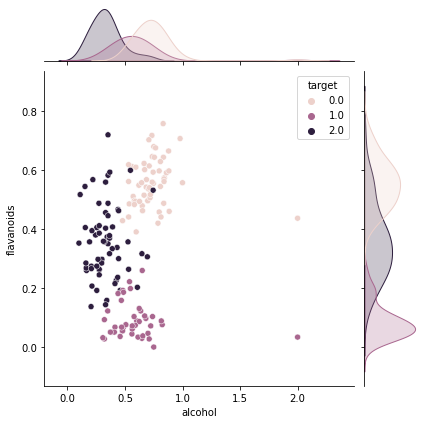

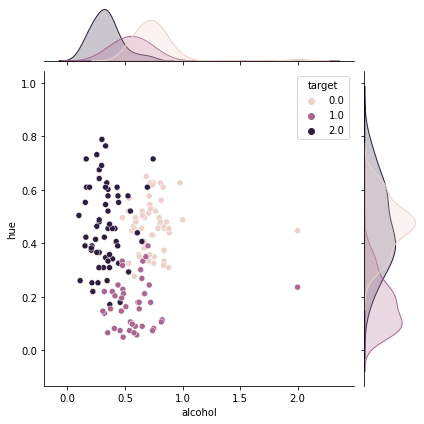

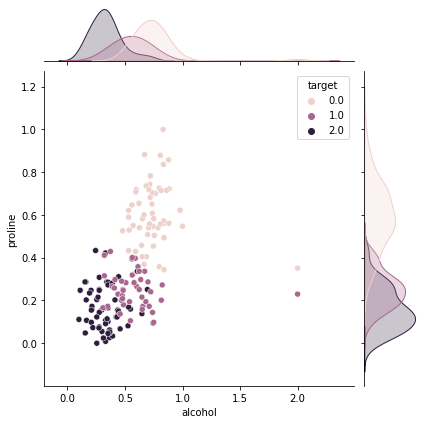

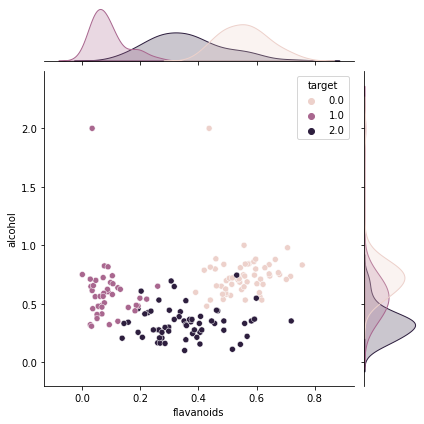

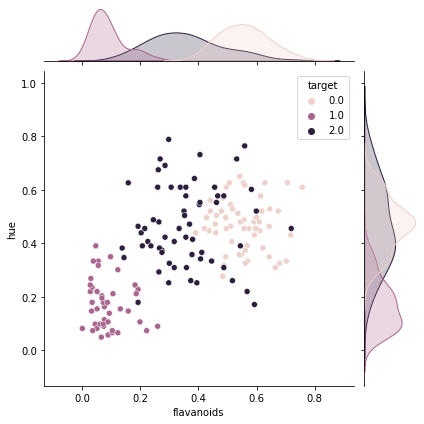

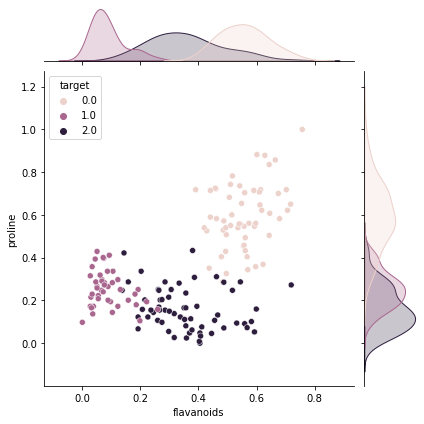

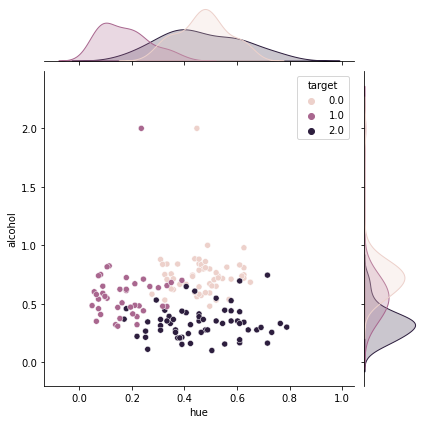

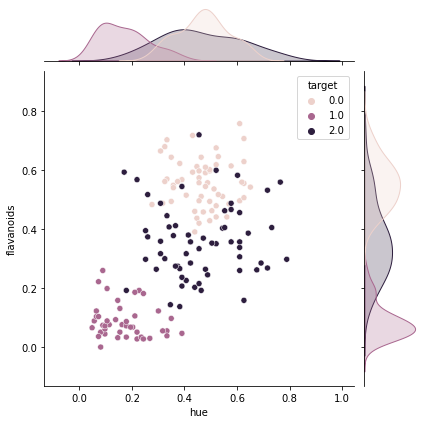

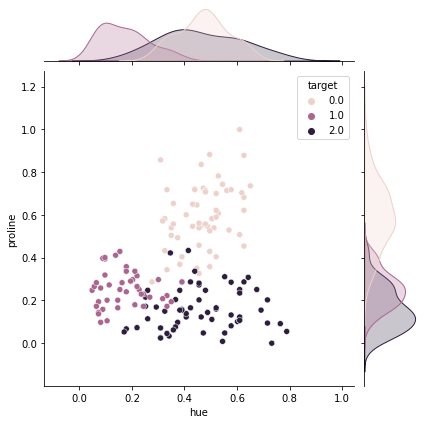

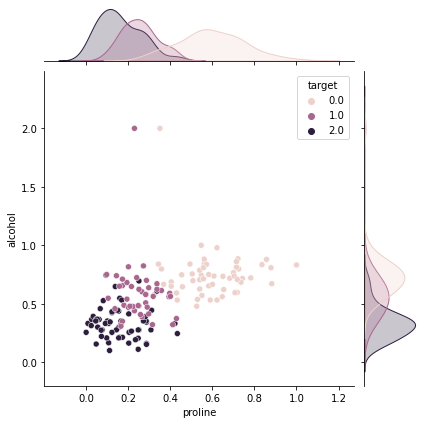

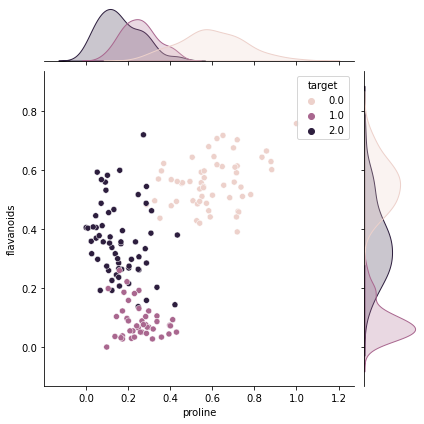

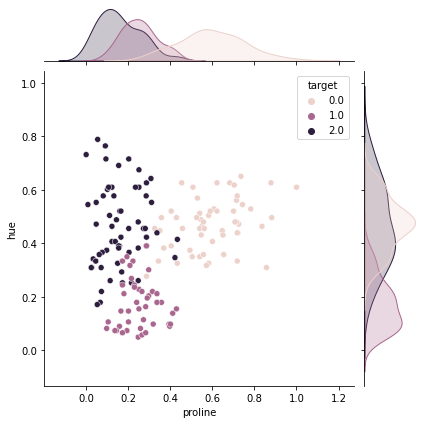

In [28]:
for i in data[col]:
    for j in data[col]:
        if(i != j):
            join_func(i, j)

## MODEL TRAINING

In [29]:
X = data[['alcohol','flavanoids','hue','proline']]
y = data['target']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 102)

In [31]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

## MODEL TESTING

In [32]:
predicted = logmodel.predict(X_test)
print('Confusion matrix : ')
print(confusion_matrix(y_test, predicted))
print('Accuracy : ', accuracy_score(y_test, predicted))

Confusion matrix : 
[[21  0  0]
 [ 0 18  0]
 [ 0  0 15]]
Accuracy :  1.0


In [33]:
logmodel.coef_

array([[ 1.58604974,  2.1536924 ,  0.61756026,  2.49791225],
       [ 0.87691823, -2.77108904, -1.96909088, -0.3493464 ],
       [-2.46296798,  0.61739664,  1.35153062, -2.14856584]])

In [34]:
logmodel.intercept_

array([-2.65783293,  1.05903273,  1.5988002 ])

## MODEL EVALUATION

### Mathematical formulas

In [35]:
print("Classification Report : \n", classification_report(y_test,predicted))

Classification Report : 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        21
         1.0       1.00      1.00      1.00        18
         2.0       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



### Plotting Models For Each Feature

Text(0, 0.5, 'target')

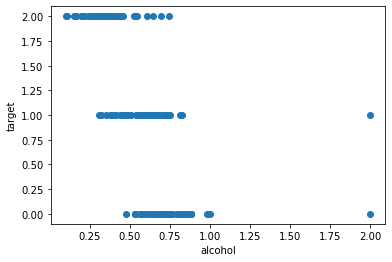

In [36]:
plt.scatter(data[col[0]], data['target'])
plt.xlabel(col[0])
plt.ylabel('target')

Text(0, 0.5, 'target')

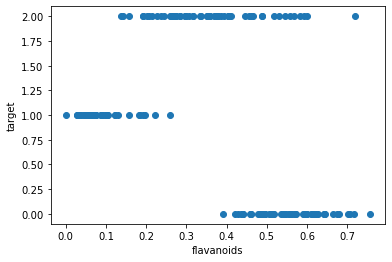

In [37]:
plt.scatter(data[col[1]], data['target'])
plt.xlabel(col[1])
plt.ylabel('target')

Text(0, 0.5, 'target')

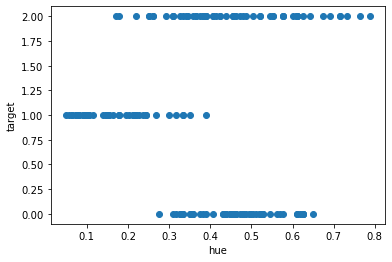

In [38]:
plt.scatter(data[col[2]], data['target'])
plt.xlabel(col[2])
plt.ylabel('target')

Text(0, 0.5, 'target')

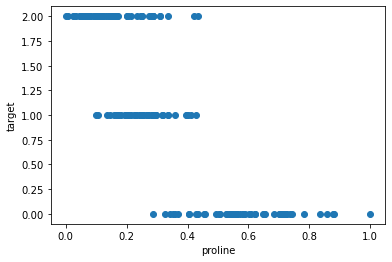

In [39]:
plt.scatter(data[col[3]], data['target'])
plt.xlabel(col[3])
plt.ylabel('target')

### Checking Imbalance Of Model

In [40]:
print(logmodel.class_weight)

None


## CLASSIFICATION OF NEW DATA 

In [49]:
new_data = [[0.74,0.57,0.62,0.63]]
new_data = np.array(new_data)

In [50]:
output = logmodel.predict(new_data)

C:\Users\Public\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [43]:
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0.0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0.0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0.0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0.0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,0.823684,0.349802,0.598930,0.484536,0.228261,0.241379,0.075949,0.584906,0.261830,0.718430,0.113821,0.161172,0.272468,1.0
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662,1.0
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290,1.0
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856,1.0


In [51]:
output

array([0.])